In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

torch.set_default_device("cuda")

In [ ]:
# Define an Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim)
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid()  # Sigmoid to constrain output between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [ ]:
# Load and preprocess OBJ files (you would need a custom function for this)
def load_and_preprocess_obj(file_path):
    # Implement loading and preprocessing of OBJ files here
    # You'll need to extract vertices, faces, and convert them to a suitable format
    vertices = []

    try:
        with open(file_path, 'r') as obj_file:
            for line in obj_file:
                tokens = line.strip().split()
                if len(tokens) == 0:
                    continue

                # Process vertex data (assuming "v" lines in the OBJ file)
                if tokens[0] == 'v':
                    if len(tokens) >= 4:
                        # Extract the x, y, z coordinates
                        x = float(tokens[1])
                        y = float(tokens[2])
                        z = float(tokens[3])
                        vertices.append([x, y, z])

    except FileNotFoundError:
        print(f"File not found: {file_path}")
        return None

    if len(vertices) == 0:
        print("No vertex data found in the OBJ file.")
        return None

    # Convert the list of vertices to a NumPy array
    vertices = np.array(vertices, dtype=np.float32)

    return vertices

In [ ]:
# Training loop
def train_autoencoder(model, data, num_epochs=50, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs in data:
            optimizer.zero_grad()
            inputs = torch.tensor(inputs, dtype=torch.float32)
            outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss}")

In [ ]:
# Load and preprocess your OBJ data
obj_data = load_and_preprocess_obj("abc-dataset/00030027_0ef34aa1b15748a5b4ad7c0e_trimesh_017.obj").T

# Define your input dimension and latent dimension
input_dim = len(obj_data[0])  # Modify based on your data structure
print(input_dim)
latent_dim = input_dim  # Adjust as needed

# Create and train the autoencoder
autoencoder = Autoencoder(input_dim, latent_dim)

train_autoencoder(autoencoder, obj_data)

# Reduce the number of meshes by encoding and decoding
def reduce_meshes(autoencoder, data):
    reduced_meshes = []
    for mesh in data:
        mesh = torch.tensor(mesh, dtype=torch.float32)
        encoded_mesh = autoencoder.encoder(mesh)
        decoded_mesh = autoencoder.decoder(encoded_mesh)
        reduced_meshes.append(decoded_mesh.detach().cpu().numpy())
    return reduced_meshes

# Use the trained autoencoder to reduce meshes
reduced_meshes = reduce_meshes(autoencoder, obj_data)

# Save or visualize the reduced meshes as needed

0          8.950581
1          8.565653
2          8.950581
3          8.565653
4          9.211812
            ...    
426744    25.196964
426745    26.411566
426746    24.639435
426747    26.411566
426748    24.639435
Name: 0, Length: 426749, dtype: float32
0        -6.249566
1        -6.489366
2        -6.249566
3        -6.489366
4        -7.493056
            ...   
426744   -2.248878
426745   -3.674364
426746   -3.674364
426747   -2.216136
426748   -2.216136
Name: 1, Length: 426749, dtype: float32
0         0.0000
1         0.0000
2         0.1000
3         0.1000
4         0.0000
           ...  
426744    0.0357
426745    0.0357
426746    0.0357
426747    0.0357
426748    0.0357
Name: 2, Length: 426749, dtype: float32


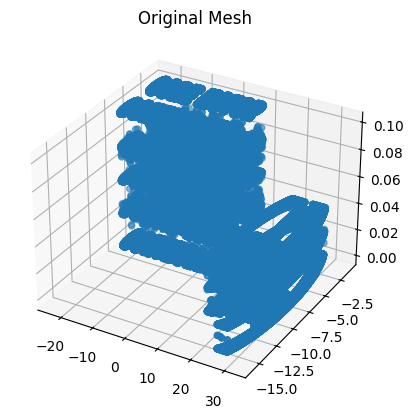

0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
426744    1.0
426745    1.0
426746    1.0
426747    1.0
426748    1.0
Name: 0, Length: 426749, dtype: float32
0         0.0
1         1.0
2         0.0
3         1.0
4         0.0
         ... 
426744    1.0
426745    1.0
426746    0.0
426747    0.0
426748    1.0
Name: 1, Length: 426749, dtype: float32
0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
426744    1.0
426745    1.0
426746    0.0
426747    1.0
426748    1.0
Name: 2, Length: 426749, dtype: float32


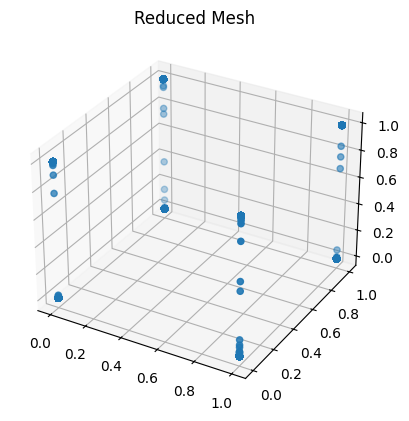

0         0.415807
1         0.508454
2         0.482179
3         0.513078
4         0.926833
            ...   
426744    0.851710
426745    0.910073
426746    0.457352
426747    0.614229
426748    0.989365
Name: 0, Length: 426749, dtype: float32
0         0.420432
1         0.640065
2         0.462183
3         0.527656
4         0.974843
            ...   
426744    0.953338
426745    0.951447
426746    0.637377
426747    0.793031
426748    0.998492
Name: 1, Length: 426749, dtype: float32
0         0.487354
1         0.585176
2         0.629624
3         0.504995
4         0.944389
            ...   
426744    0.894650
426745    0.936518
426746    0.490255
426747    0.756122
426748    0.991404
Name: 2, Length: 426749, dtype: float32


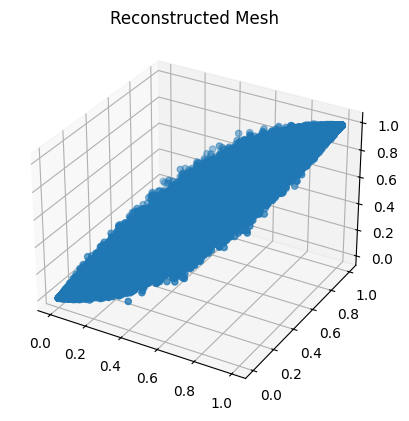

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ... (Previous code for Autoencoder, training, and mesh reduction)

# Function to visualize a 3D mesh
def visualize_mesh(mesh, title="Reduced Mesh"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Extract x, y, z coordinates from the mesh
    x = mesh.loc[0]
    y = mesh.loc[1]
    z = mesh.loc[2]

    print(x)
    print(y)
    print(z)
    
    ax.scatter(x, y, z)
    ax.set_title(title)
    plt.show()

obj_data = pd.DataFrame(obj_data)
reduced_meshes = pd.DataFrame(reduced_meshes)

visualize_mesh(obj_data, title="Original Mesh")
visualize_mesh(reduced_meshes, title="Reduced Mesh")

# Reconstruct the mesh from the reduced version
reconstructed_mesh = autoencoder.decoder(torch.tensor(reduced_meshes.values, dtype=torch.float32)).detach().cpu().numpy()
reconstructed_mesh_df = pd.DataFrame(reconstructed_mesh)  # Convert the reconstructed mesh to a DataFrame
visualize_mesh(reconstructed_mesh_df, title="Reconstructed Mesh")
